In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [78]:
warnings.filterwarnings('ignore')

In [79]:
data = pd.read_csv("/content/BAJFINANCE.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [80]:
data.drop(['Date'], axis=1, inplace=True)

In [81]:
print(data.head())
print(data.shape)
print(data.columns)

       Symbol Series  Prev Close   Open   High   Low   Last  Close   VWAP  \
0  BAJAUTOFIN     EQ       46.95  49.45  50.75  46.5  50.75  50.75  50.05   
1  BAJAUTOFIN     EQ       50.75  53.20  53.20  47.9  48.00  48.10  48.56   
2  BAJAUTOFIN     EQ       48.10  46.55  47.40  44.6  44.60  44.60  45.47   
3  BAJAUTOFIN     EQ       44.60  43.50  46.00  42.1  46.00  45.25  44.43   
4  BAJAUTOFIN     EQ       45.25  48.00  48.00  42.0  42.90  42.90  44.44   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0    7600  3.803800e+10     NaN                 NaN          NaN  
1    5000  2.428000e+10     NaN                 NaN          NaN  
2    3500  1.591450e+10     NaN                 NaN          NaN  
3    6200  2.754750e+10     NaN                 NaN          NaN  
4    3500  1.555550e+10     NaN                 NaN          NaN  
(5235, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trade

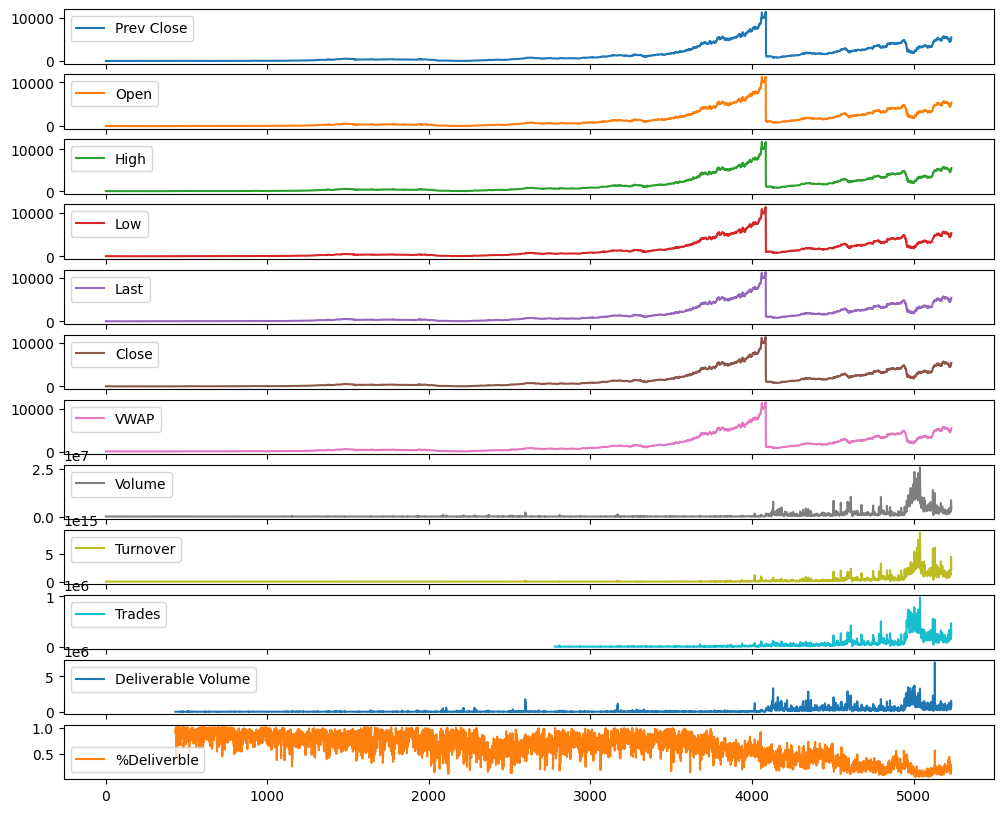

Symbol                   2
Series                   1
Prev Close            4468
Open                  3615
High                  3764
Low                   3850
Last                  3756
Close                 4469
VWAP                  4993
Volume                4742
Turnover              5232
Trades                2329
Deliverable Volume    4489
%Deliverble           3576
dtype: int64

In [82]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [83]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


          Symbol Series  Prev Close     Open     High      Low     Last  \
0     BAJAUTOFIN     EQ       46.95    49.45    50.75    46.50    50.75   
1     BAJAUTOFIN     EQ       50.75    53.20    53.20    47.90    48.00   
2     BAJAUTOFIN     EQ       48.10    46.55    47.40    44.60    44.60   
3     BAJAUTOFIN     EQ       44.60    43.50    46.00    42.10    46.00   
4     BAJAUTOFIN     EQ       45.25    48.00    48.00    42.00    42.90   
...          ...    ...         ...      ...      ...      ...      ...   
5230  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00  4744.00   
5231  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55  4886.00   
5232  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00  5255.00   
5233  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00  5475.00   
5234  BAJFINANCE     EQ     5484.85  5350.00  5524.65  5327.70  5449.00   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0       50.75    50.

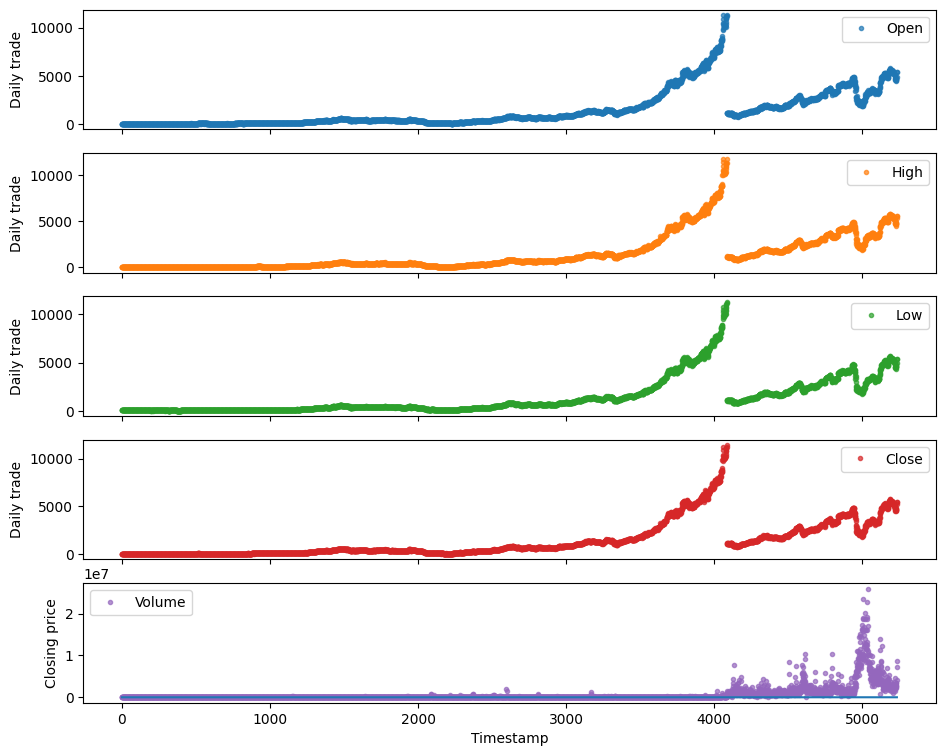

In [84]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [85]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

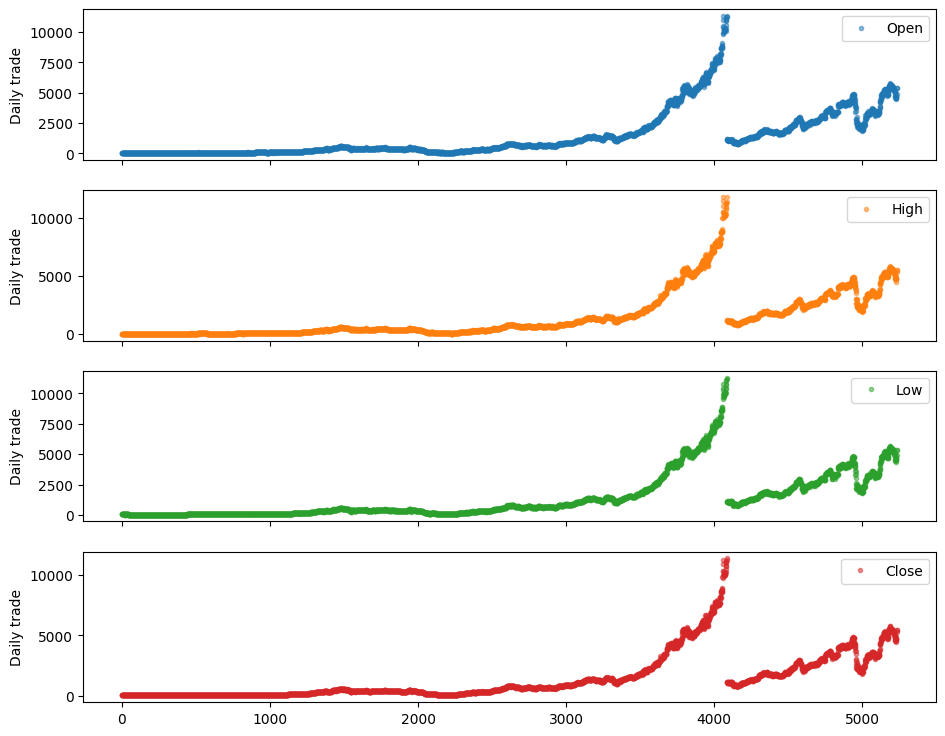

In [86]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close     Open     High      Low     Last  \
0     BAJAUTOFIN     EQ       46.95    49.45    50.75    46.50    50.75   
1     BAJAUTOFIN     EQ       50.75    53.20    53.20    47.90    48.00   
2     BAJAUTOFIN     EQ       48.10    46.55    47.40    44.60    44.60   
3     BAJAUTOFIN     EQ       44.60    43.50    46.00    42.10    46.00   
4     BAJAUTOFIN     EQ       45.25    48.00    48.00    42.00    42.90   
...          ...    ...         ...      ...      ...      ...      ...   
5230  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00  4744.00   
5231  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55  4886.00   
5232  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00  5255.00   
5233  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00  5475.00   
5234  BAJFINANCE     EQ     5484.85  5350.00  5524.65  5327.70  5449.00   

        Close     VWAP   Volume      Turnover    Trades  Deliverable Volume  \
0       50.75    50.

,count,mean,std,min,25%,50%,75%,max
Prev Close,5235.0,1.414246e+03,1.849696e+03,2.450000e+01,1.188750e+02,6.109500e+02,1.922000e+03,1.139330e+04
Open,5235.0,1.415326e+03,1.850061e+03,2.520000e+01,1.200000e+02,6.063000e+02,1.925425e+03,1.130000e+04
High,5235.0,1.439089e+03,1.878003e+03,2.520000e+01,1.238750e+02,6.240000e+02,1.949425e+03,1.177000e+04
Low,5235.0,1.390674e+03,1.820721e+03,2.450000e+01,1.160250e+02,5.981000e+02,1.900000e+03,1.129400e+04
Last,5235.0,1.415300e+03,1.850459e+03,2.450000e+01,1.190000e+02,6.110000e+02,1.924425e+03,1.138670e+04
Close,5235.0,1.415278e+03,1.850441e+03,2.450000e+01,1.194500e+02,6.110000e+02,1.923575e+03,1.139330e+04
VWAP,5235.0,1.415529e+03,1.850062e+03,2.520000e+01,1.205600e+02,6.110400e+02,1.920975e+03,1.149073e+04
Volume,5235.0,6.116085e+05,1.897438e+06,3.000000e+00,4.899000e+03,1.687000e+04,1.191885e+05,2.596010e+07
Turnover,5235.0,1.789601e+14,5.754942e+14,1.047000e+07,7.308218e+10,9.145276e+11,3.981237e+13,8.787972e+15
Trades,2456.0,5.642310e+04,1.060397e+05,2.100000e+01,1.682000e+03,1.371750e+04,5.952750e+04,9.791110e+05


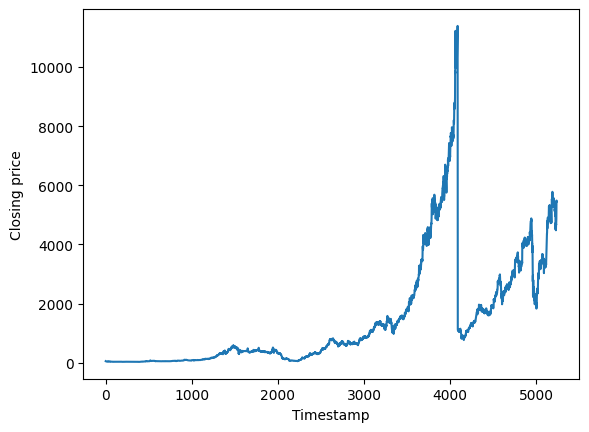

In [87]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [88]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4106
1027


In [89]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
65/65 [==============================] - 4s 13ms/step - loss: 0.0710 - mse: 0.0710 - mae: 0.1562 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0701
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0560 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0485
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0453 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0425
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0408 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0406
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0379 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0391
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0362 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0370
Epoch 7/100
65/65 [==

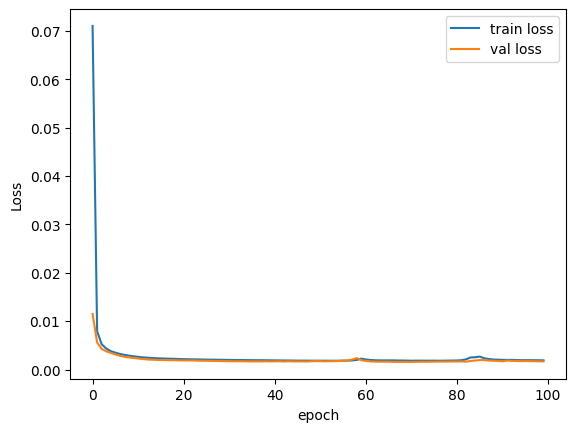

In [90]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

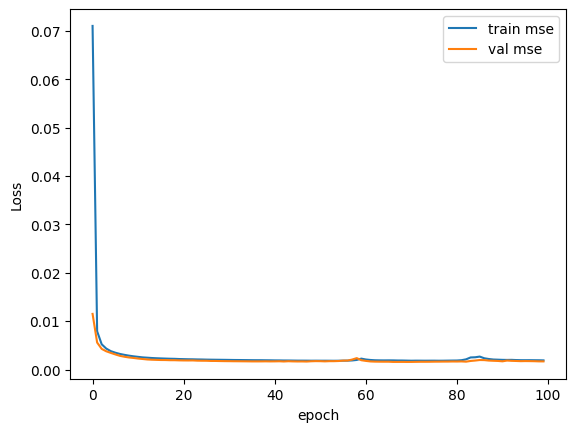

In [91]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

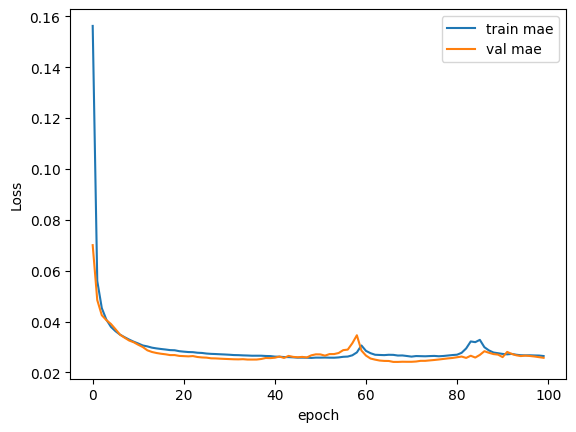

In [92]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_7 (LSTM)               (None, 32)                6272      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 activation_10 (Activation)  (None, 64)               

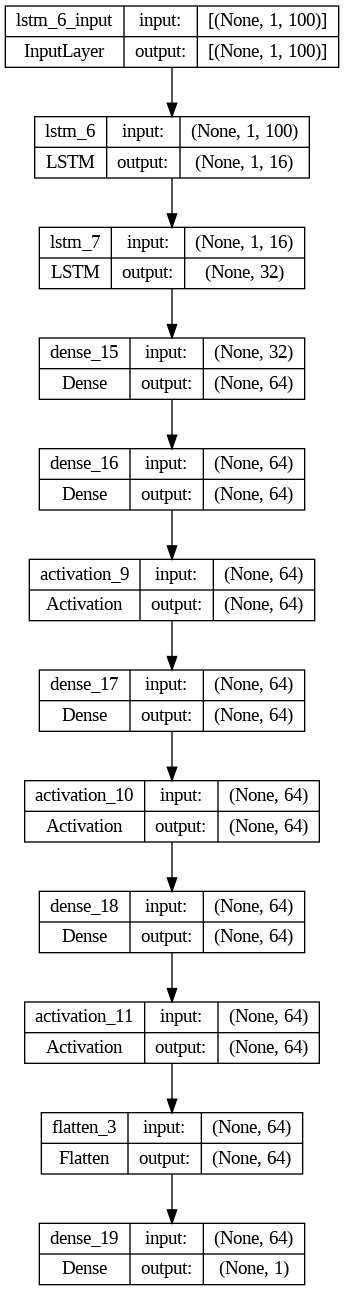

In [93]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [94]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0258


[0.0016763913445174694, 0.0016763913445174694, 0.02576362155377865]

In [95]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.991465
R2 Score: 0.991273
Max Error: 0.460553


33/33 [==============================] - 0s 1ms/step


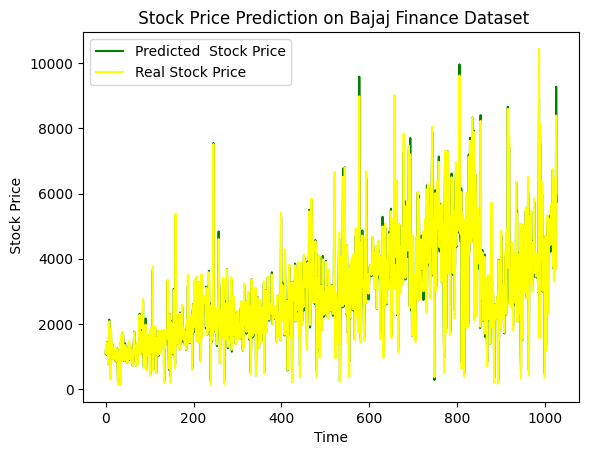

In [96]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on Bajaj Finance Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

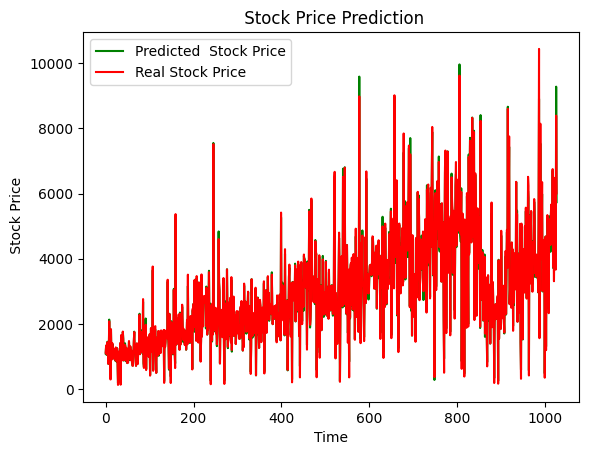

In [97]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [98]:
predicted

array([[1091.8185],
       [1334.4995],
       [1048.749 ],
       ...,
       [3988.6926],
       [9277.584 ],
       [5734.0415]], dtype=float32)

In [99]:
test_label

array([[1120.53673478],
       [1332.20391304],
       [1066.64931993],
       ...,
       [3664.72      ],
       [8389.8255814 ],
       [6002.99817243]])

In [100]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0      1120.536735      1091.818481
1      1332.203913      1334.499512
2      1066.649320      1048.749023
3      1280.842657      1284.054199
4      1436.042937      1451.626343
...            ...              ...
1022   6481.038278      6448.644043
1023   4833.514768      4880.292480
1024   3664.720000      3988.692627
1025   8389.825581      9277.583984
1026   6002.998172      5734.041504

[1027 rows x 2 columns]


In [101]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 1120.5367347837578 | 1091.8184814453125 |
|  1   | 1332.2039130434785 |  1334.49951171875  |
|  2   | 1066.6493199290362 |  1048.7490234375   |
|  3   | 1280.8426573426573 |  1284.05419921875  |
|  4   | 1436.042936969155  | 1451.6263427734375 |
|  5   | 1102.9314570428226 | 1079.141357421875  |
|  6   | 774.2523182863158  |  771.58349609375   |
|  7   | 1016.7674999999999 | 1041.8878173828125 |
|  8   | 2078.5747642568476 | 2130.937255859375  |
|  9   | 1339.1459008339866 | 1340.6453857421875 |
|  10  | 1020.3272727272727 | 1021.2197875976562 |
|  11  | 293.6510089876207  | 391.20452880859375 |
|  12  | 1836.1648331052538 |     1822.65625     |
|  13  | 890.0474274070299  | 964.4791870117188  |
|  14  | 1151.0075662407046 | 1138.127197265625  |
|  15  | 1409.8882468811557 | 1376.160400390625  |
|  16  | 1292.5621959056275 |  

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 16)             7488      
                                                                 
 lstm_7 (LSTM)               (None, 32)                6272      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 activation_10 (Activation)  (None, 64)               

In [103]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))